In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [14]:
from glob import glob
from PIL import Image
import cv2

train=pd.read_csv('train/train.csv')
test=pd.read_csv('test.csv')

Images='train/kaggle_images/'
# Glob the directories and get the lists of train and test images
img = glob(Images + '*')

In [5]:
# Compute at the number of images:
print('Total Number of images is {}'.format(len(img)))

Total Number of images is 8196


4


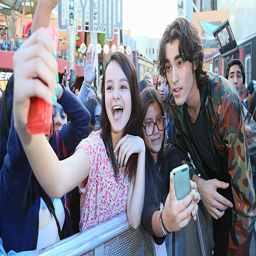

In [114]:
# Importing Image from PIL package
from PIL import Image
import random

img_array = []
img_data = []
X = []
Y=[]
train_vals = pd.read_csv('train/train.csv', sep=",")
filename = train_vals["Name"] 
eval = train_vals["HeadCount"]
print(eval[0])
i=0;
j=0;

# creating image objects
while i<5000:
    #print(str(10001+i+j) + ".jpg")
    img_data = []
    if(filename[i] == str(10001+i+j) + ".jpg" and filename[i] != "10070.jpg" and filename[i] != "11175.jpg"):
        im = Image.open("train/kaggle_images/" + str(10001+i+j) + ".jpg")
        newsize = (256, 256)
        im = im.resize(newsize)
        px = im.load()
        for a in range(0, 256):
            row_data = []
            for b in range(0, 256):
                row_data.append(px[a,b][0])
            img_data.append(row_data)
        X.append(img_data)
        Y.append(eval[i])
        img_array.append(im)
    else:
        j = j + 1;
    i = i + 1;

display(img_array[7])

In [62]:
print(Y)

[4, 4, 2, 3, 4, 6, 6, 8, 4, 7, 3, 4, 2, 4, 3, 4, 4, 4, 2, 3, 2, 6, 3, 2, 2, 2, 3, 2, 5, 5, 2, 2, 2, 6, 3, 4, 2, 3, 8, 4, 4, 7, 8, 4, 7, 2, 2, 4, 5, 6, 2, 2, 2, 2, 4, 2, 2, 5, 8, 4, 2, 2, 8, 2, 6, 2, 2, 5, 2, 4, 3, 9, 5, 8, 6, 7, 5, 2, 2, 2, 2, 3, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 3, 3, 2, 2, 2, 2, 3, 3, 14]


In [129]:
#second square building test

# Importing Image from PIL package
from PIL import Image
import random

img_array = []
img_data = []
X = []
Y = []

# creating image objects
for i in range(3000):
    img_data = []
    im = Image.open("image_detector/images/black_background_256.png")
    px = im.load()
    num_objects = random.randint(0, 6)
    for j in range(num_objects):
        y = random.randint(3, 252)
        x = random.randint(0, 90)
        if(j%2==1):
            x = random.randint(100, 190)
        if(j>3):
            y = random.randint(150, 190)
        elif(j>1):
            y = random.randint(90, 130)
        else:
            y = random.randint(0, 40)
        px[x, y] = (255, 255, 0)
        px[x+1, y] = (255, 255, 0)
        px[x, y+1] = (255, 255, 0)
        px[x+1, y+1] = (255, 255, 0)
        px[x-1, y-1] = (128, 128, 0)
        px[x-1, y] = (128, 128, 0)
        px[x-1, y+1] = (128, 128, 0)
        px[x-1, y+2] = (128, 128, 0)
        px[x+2, y-1] = (128, 128, 0)
        px[x+2, y] = (128, 128, 0)
        px[x+2, y+1] = (128, 128, 0)
        px[x+2, y+2] = (128, 128, 0)
        px[x, y+2] = (128, 128, 0)
        px[x, y-1] = (128, 128, 0)
        px[x+1, y+2] = (128, 128, 0)
        px[x+1, y-1] = (128, 128, 0)
        #print (px[x, y])
    for a in range(0, 256):
        row_data = []
        for b in range(0, 256):
            row_data.append(px[b,a][0])
        img_data.append(row_data)
    X.append(img_data)
    Y.append(str(num_objects))
    img_array.append(im)
    #display(im)

In [101]:
#generate people images

# Importing Image from PIL package
from PIL import Image
import random

img_array = []
img_data = []
X = []
Y = []

# Persons to use for generation are at:
# image_detector/images/Person_X.png

p = [Image.open("image_detector/images/Person_0.png"),
     Image.open("image_detector/images/Person_1.png"),
     Image.open("image_detector/images/Person_2.png"),
     Image.open("image_detector/images/Person_3.png"),
     Image.open("image_detector/images/Person_4.png"),
     Image.open("image_detector/images/Person_5.png")]

# creating image objects
for i in range(5000):
    img_data = []
    random.shuffle(p)
    im = Image.open("image_detector/images/black_background_256.png")
    px = im.load()
    num_objects = random.randint(0, 5)
    for j in range(num_objects):
        x_loc = random.randint(-40, 60)
        if(j%2==1):
            x_loc = random.randint(100, 180)
        if(j>3):
            im.paste(p[j], (x_loc, random.randint(150, 190)), p[j])
        elif(j>1):
            im.paste(p[j], (x_loc, random.randint(90, 130)), p[j])
        else:
            im.paste(p[j], (x_loc, random.randint(0, 40)), p[j])
    for a in range(0, 256):
        row_data = []
        for b in range(0, 256):
            row_data.append(px[b,a][0])
        img_data.append(row_data)
    X.append(img_data)
    Y.append(str(num_objects))
    img_array.append(im)
    #display(im)

3000


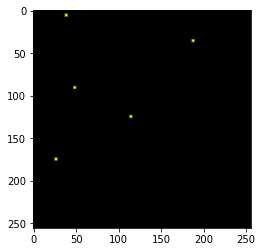

['2', '2', '6', '4', '6', '3', '0', '6', '2', '1', '2', '2', '2', '2', '2', '2', '5', '5', '3', '0', '4', '3', '3', '2', '3', '1', '6', '4', '2', '0', '0', '3', '3', '0', '0', '6', '1', '5', '3', '0', '5', '2', '5', '6', '1', '3', '4', '4', '3', '4', '3', '1', '4', '6', '6', '1', '1', '1', '3', '3', '2', '4', '2', '3', '2', '4', '3', '3', '6', '5', '4', '4', '2', '2', '6', '1', '4', '1', '2', '6', '6', '0', '4', '0', '3', '3', '2', '0', '1', '0', '3', '6', '5', '1', '4', '1', '6', '6', '0', '6', '0', '4', '5', '6', '5', '5', '6', '3', '2', '1', '1', '0', '6', '0', '1', '2', '6', '4', '5', '5', '1', '5', '0', '1', '5', '5', '5', '0', '6', '4', '4', '2', '2', '6', '2', '6', '2', '1', '6', '0', '6', '5', '0', '2', '6', '2', '3', '4', '3', '3', '6', '0', '2', '6', '0', '1', '2', '0', '0', '0', '0', '0', '4', '6', '5', '6', '6', '2', '4', '2', '6', '1', '0', '6', '2', '0', '4', '1', '6', '5', '5', '1', '6', '0', '0', '4', '3', '2', '0', '1', '4', '4', '3', '2', '2', '2', '3', '3', '3', '4',

In [130]:
print(len(X))

#plt.imshow(X[17])
plt.imshow(img_array[17])
plt.show()

print(Y)

img_array[17].save("temp.png", format="PNG")

#print(X)

In [131]:
from sklearn.utils import shuffle

# compress X to two dimensions:
Z = []
for i in range(len(X)):
    img_data = []
    for a in range(0, 256):        
        for b in range(0, 256):
            img_data.append(X[i][b][a])
    Z.append(img_data)
X = Z
# shuffle the images:
X, y = shuffle(X, Y, random_state=42)

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier()
print(clf)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier()


RandomForestClassifier()

In [133]:
from sklearn.metrics import accuracy_score
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.35


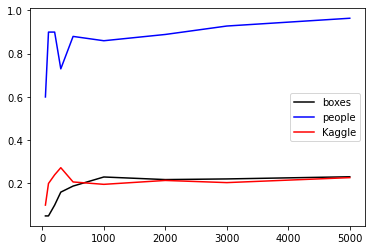

In [128]:

samples = [50, 100, 200, 300, 500, 1000, 2000, 3000, 5000]
results1 = [0.05, 0.05, 0.1, 0.16, 0.188, 0.23, 0.218, 0.221, 0.231] #drawing boxes
results2 = [0.60, 0.90, 0.90, 0.73, 0.88, 0.86, 0.889, 0.928, 0.964] #drawing people
results3 = [0.1, 0.2, 0.24, 0.273, 0.207, 0.196, 0.214, 0.204, 0.227] #Kaggle people

plt.plot(samples, results1, 'k')
plt.plot(samples, results2, 'b')
plt.plot(samples, results3, 'r')

plt.legend(['boxes', 'people', 'Kaggle'])


In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import metrics

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

print("Naive Bays' Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Naive Bays' Accuracy is:  15.909090909090908
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.20      0.14      0.17         7
           4       0.00      0.00      0.00         7
           5       0.60      0.27      0.37        11
           6       0.25      0.33      0.29         6
           7       0.00      0.00      0.00         1
           8       0.25      0.33      0.29         3
           9       0.00      0.00      0.00         2

    accuracy                           0.16        44
   macro avg       0.14      0.12      0.12        44
weighted avg       0.23      0.16      0.18        44



/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  13.636363636363635
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.15      0.29      0.20         7
           4       0.11      0.29      0.15         7
           5       0.25      0.09      0.13        11
           6       0.25      0.17      0.20         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.14        44
   macro avg       0.08      0.09      0.08        44
weighted avg       0.14      0.14      0.12        44



/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("SVM's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  15.909090909090908
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         7
           4       0.16      1.00      0.27         7
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.16        44
   macro avg       0.02      0.11      0.03        44
weighted avg       0.03      0.16      0.04        44



/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()

LDA.fit(X_train,y_train)

predicted_values = LDA.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("LinearDiscriminantAnalysis' Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

LinearDiscriminantAnalysis' Accuracy is:  20.454545454545457
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.14      0.17      0.15         6
           3       0.29      0.71      0.42         7
           4       0.19      0.43      0.26         7
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.20        44
   macro avg       0.07      0.15      0.09        44
weighted avg       0.10      0.20      0.13        44



/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(X_train,y_train)

predicted_values = KNN.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("KNeighborsClassifier' Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

KNeighborsClassifier' Accuracy is:  2.272727272727273
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.07      0.14      0.09         7
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         2

    accuracy                           0.02        44
   macro avg       0.01      0.02      0.01        44
weighted avg       0.01      0.02      0.01        44



/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
